In [158]:
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os
import sys
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
sys.path.insert(0, '../../src/')
from data_loader import load_data

## Findings

* "WCTIMESTRING" column => some of the entries are not correct (13 PM, 75 PM, etc)
* Some teams have changed names over years hence the number of entries are less than the other teams
* Made a dictionary of shooting types but it looks like a shooting types can enter 2 different types at the same time

In [159]:
seasons = load_data()

<AxesSubplot:>

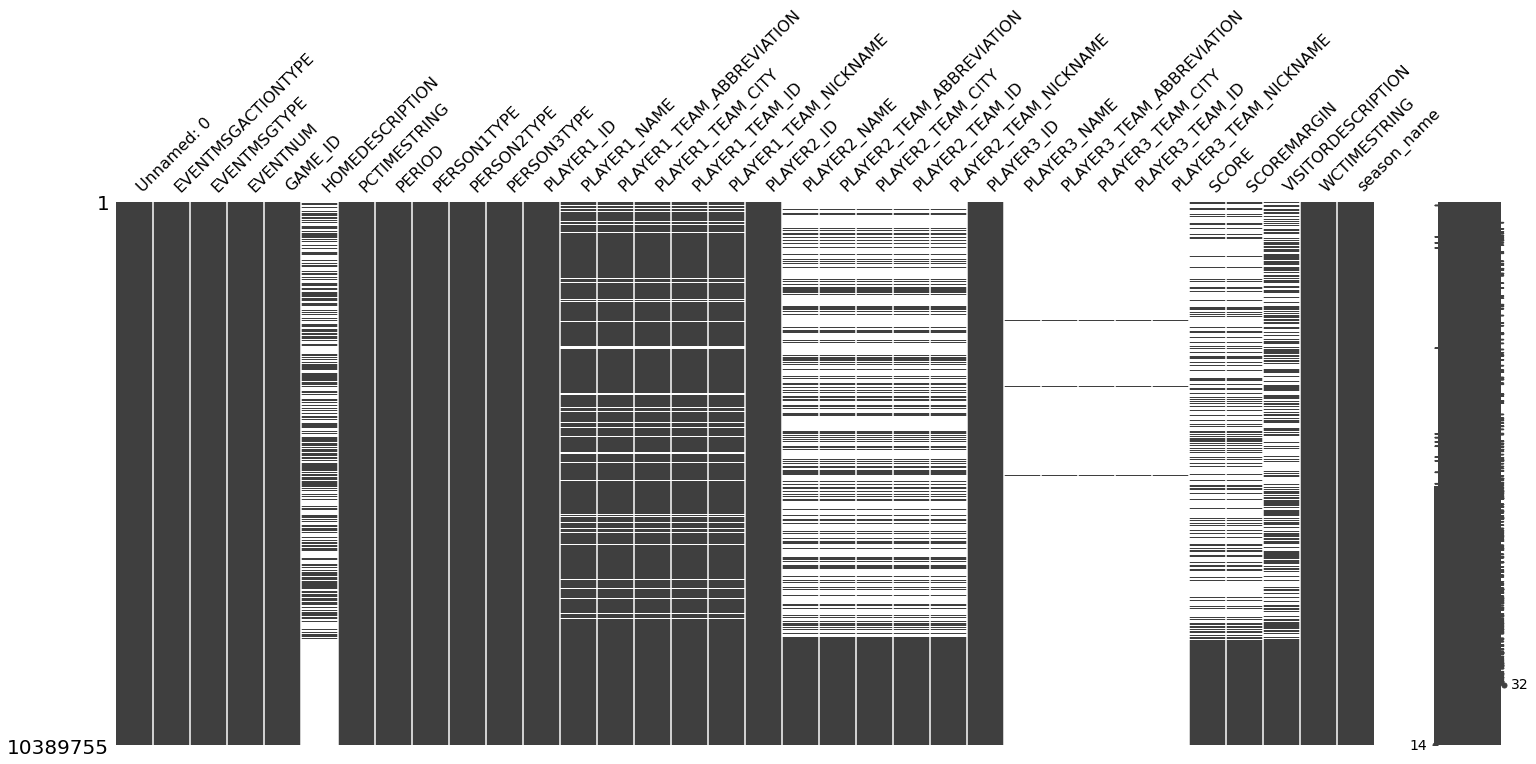

In [160]:
#how many NaNs compared to all data
msno.matrix(seasons) 

In [161]:
#most plays(event) for 1 game per year
events = {}
events["maximum_play"] = seasons.groupby("season_name")['Unnamed: 0'].max()
events["total_play"] = seasons.groupby('season_name').size()
events = pd.DataFrame(events)
events

,maximum_play,total_play
season_name,,
2000-01,605,537157
2001-02,587,530228
2002-03,587,533348
2003-04,624,530929
2004-05,630,559076
2005-06,632,554120
2006-07,677,556688
2007-08,613,551101
2008-09,615,546453


#### Trying make observations about the average start time and the duration of the games however there are some miswritten information such as 13 PM, 70 PM

In [170]:
starting_times = seasons[["GAME_ID", "WCTIMESTRING", "season_name"]]

game_id ={}
time = {}
year = {}

time_lst = []
year_lst = []
game_id = []

for i in starting_times.index : 
    str_beginning_hour = starting_times['WCTIMESTRING'][i]
    int_beginning_hour = int(str_beginning_hour[:str_beginning_hour.index(':')])
    if int_beginning_hour > 12:
        game_id.append(starting_times['GAME_ID'][i])
        time_lst.append(starting_times['WCTIMESTRING'][i])
        year_lst.append(starting_times['season_name'][i])

time["GAME_ID"] = game_id
time["WCTIMESTRING"] = time_lst
time["season_name"] = year_lst

time_stats = pd.DataFrame(time)
time_stats.head(10)

,GAME_ID,WCTIMESTRING,season_name
0,20001053,13:01 PM,2000-01
1,20001053,13:01 PM,2000-01
2,20001053,13:01 PM,2000-01
3,20001053,13:01 PM,2000-01
4,20001053,13:02 PM,2000-01
5,20001053,13:02 PM,2000-01
6,20001053,13:02 PM,2000-01
7,20001053,13:02 PM,2000-01
8,20001053,13:02 PM,2000-01
9,20001053,13:03 PM,2000-01


In [171]:
time_analysis = {}

#Total number of miswritten time per year
time_analysis ["count_of_miswritten_time"] = time_stats.groupby("season_name")['WCTIMESTRING'].count()
#How many games does have miswritten time per year
time_analysis ["count_of_distinct_miswritten_time"] = time_stats.groupby("season_name")['GAME_ID'].nunique()

time_analysis = pd.DataFrame(time_analysis)
time_analysis


,count_of_miswritten_time,count_of_distinct_miswritten_time
season_name,,
2000-01,2068,8
2001-02,29081,108
2002-03,60001,323
2003-04,10981,110
2004-05,21906,158
2005-06,4942,97
2006-07,9750,116
2007-08,5877,83
2008-09,6321,100


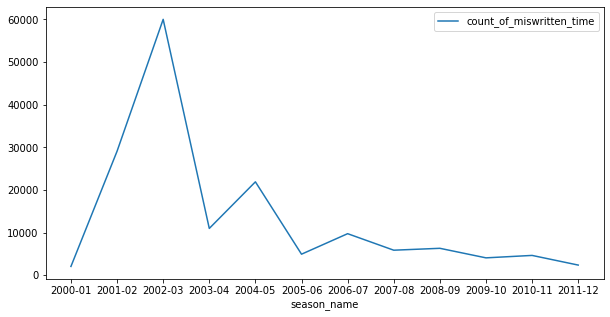

In [172]:
time_analysis["count_of_miswritten_time"].plot(figsize=(10,5))
aa = time_analysis.index.to_list()
plt.xticks(list(range(len(aa))), aa)
plt.legend()
plt.show()

In [173]:
time_stats["WCTIMESTRING"] = time_stats["WCTIMESTRING"].apply(lambda x: x[:len(x)-2])

time_stats['WCTIMESTRING'] = time_stats['WCTIMESTRING'].str.replace(':','.')
time_stats['WCTIMESTRING'] =time_stats['WCTIMESTRING'].astype('float')
time_stats["WCTIMESTRING"].value_counts(bins = [13,14,50,100,757])

(12.999, 14.0]    118196
(14.0, 50.0]       42453
(50.0, 100.0]        951
(100.0, 757.0]       453
Name: WCTIMESTRING, dtype: int64

In [174]:
#Number of different teams played during for these 18 years
seasons["PLAYER1_TEAM_ABBREVIATION"].nunique()

36

In [175]:
#List of all teams played in these 18 seasons and total number of plays
df = seasons.groupby(['PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ABBREVIATION']).size().reset_index(name='Freq')
df = df.sort_values("Freq", ascending=False)
df

,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,Freq
23,Nuggets,DEN,326530
35,Warriors,GSW,325072
0,76ers,PHI,323475
24,Pacers,IND,321170
18,Lakers,LAL,321004
5,Celtics,BOS,319383
6,Clippers,LAC,319052
20,Mavericks,DAL,319007
15,Jazz,UTA,318528
16,Kings,SAC,318525


In [176]:
#Which teams have changed their names
a = df[df.groupby(['PLAYER1_TEAM_NICKNAME'])['PLAYER1_TEAM_NICKNAME'].transform('size').gt(1)]
a

,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,Freq
7,Grizzlies,MEM,299425
22,Nets,NJN,197675
13,Hornets,NOH,142284
21,Nets,BKN,120070
11,Hornets,CHA,84884
12,Hornets,CHH,33476
14,Hornets,NOK,32552
8,Grizzlies,VAN,16271


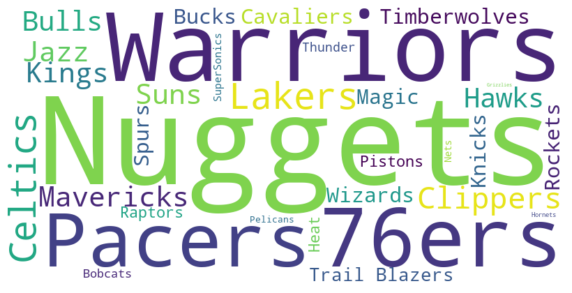

In [177]:
#Visualizing  all teams played in these 18 seasons and total number of plays
data = dict(zip(df['PLAYER1_TEAM_NICKNAME'].tolist(), df['Freq'].tolist()))
data = df.set_index('PLAYER1_TEAM_NICKNAME').to_dict()['Freq']

from wordcloud import WordCloud
wc = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(data)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [178]:
#How the scoring type changed over seasons?
per_season_stats = {}

step_back_list = ["Step Back Bank Jump Shot", "Step Back Jump Shot"]
fade_away_list = ["Fadeaway Jumper","Fadeaway Bank Shot", "Turnaround Fadeaway", "Turnaround Fadeaway Bank Jump Shot"]
dunk_list = ["Dunk","Slam Dunk", "Driving Dunk", "Dunk", "Driving Dunk", "Running Dunk", "Reverse Dunk","Alley Oop Dunk","Follow Up Dunk","Putback Dunk","Driving Slam Dunk","Reverse Slam Dunk","Running Slam Dunk","Putback Reverse Dunk","Putback Slam Dunk","Running Alley Oop Dunk Shot","Tip Dunk Shot","Cutting Dunk Shot","Driving Reverse Dunk Shot","Running Reverse Dunk Shot"]
layup_list = ["Layup","Driving Layup","Running Layup","Alley Oop Layup","Reverse Layup","Finger Roll Layup","Putback Layup","Driving Reverse Layup","Running Reverse Layup","Driving Finger Roll Layup","Running Finger Roll Layup","Tip Layup Shot","Cutting Layup Shot","Cutting Finger Roll Layup Shot","Running Alley Oop Layup Shot"]

per_season_stats["layups_attempted_per_game"] = seasons[seasons["EVENTMSGACTIONTYPE"].isin(layup_list)].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2
per_season_stats["dunks_attempted_per_game"] = seasons[seasons["EVENTMSGACTIONTYPE"].isin(dunk_list)].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2
per_season_stats["stepbacks_attempted_per_game"] = seasons[seasons["EVENTMSGACTIONTYPE"].isin(step_back_list)].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2
per_season_stats["fade_away_attempted_per_game"] = seasons[seasons["EVENTMSGACTIONTYPE"].isin(fade_away_list)].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2

per_season_stats = pd.DataFrame(per_season_stats)
per_season_stats

,layups_attempted_per_game,dunks_attempted_per_game,stepbacks_attempted_per_game,fade_away_attempted_per_game
season_name,,,,
2000-01,16.795627,3.709637,NaN,NaN
2001-02,17.457527,3.933755,NaN,1.420378
2002-03,17.575694,3.804037,NaN,1.545455
2003-04,18.067704,3.755265,NaN,1.518129
2004-05,18.574797,4.076892,NaN,1.392529
2005-06,18.880488,3.839300,NaN,1.510787
2006-07,19.475610,3.698859,NaN,1.405591
2007-08,19.602033,4.133878,1.086890,1.716746
2008-09,19.995935,4.194103,1.128035,1.970643


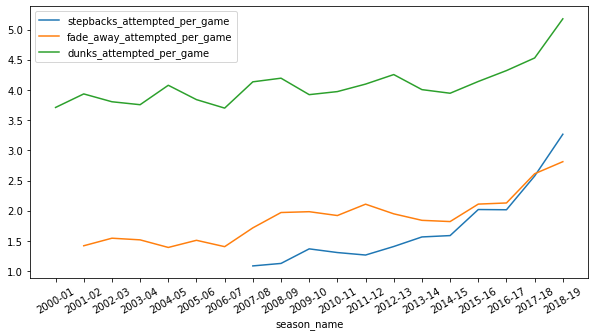

In [181]:
per_season_stats["stepbacks_attempted_per_game"].plot(figsize=(10,5))
per_season_stats["fade_away_attempted_per_game"].plot(figsize=(10,5))
per_season_stats["dunks_attempted_per_game"].plot(figsize=(10,5))
#per_season_stats["layups_attempted_per_game"].plot(figsize=(10,5))

season_names = per_season_stats.index.to_list()
plt.xticks(list(range(len(season_names))), season_names, rotation=30)
plt.legend()
plt.show()
